# Actividad N° 06: Clustering

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *aw_fb_data.csv* de Apple Watch y Fitbit Data. El objetivo de la actividad aplicar clustering para agrupar los datos y describir cada uno de estos clusters.

# Consigna

**Consideraciones**

- Nos basamos en el dataset de Kaggle: Apple Watch and Fitbit data.
- Repliquen el notebook y apliquen lo aprendido a este dataset.

**Preparación de datos**

- Eliminar la columna X1 y hacer un get dummies.

**KMeans**

- Probar con n_clusters=3.
- Gráfico 3D para las columnas x='gender', y='age', z='calories' y color='activity'

**HDBSCAN**

- Probar con min_cluster_size=80.

**Output**

- Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.

# Código

## Importación de librerías y datos

In [1]:
import pandas as pd
from funpymodeling.exploratory import status
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)
data.head(3)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


## Análisis inicial de los datos

In [3]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


## Preparación inicial de los datos

In [4]:
data.drop(columns=["X1"], inplace=True)

In [5]:
activity_order = {
    "Lying": 0,
    "Sitting": 1,
    "Self Pace walk": 2,
    "Running 3 METs": 3,
    "Running 5 METs": 4,
    "Running 7 METs": 5
}

data['activity_order'] = data['activity'].map(activity_order)
data.drop(columns="activity",inplace=True)

In [6]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity_order'],
      dtype='object')

In [7]:
f_data = pd.get_dummies(data,drop_first=True)
f_data.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'activity_order', 'device_fitbit'],
      dtype='object')

In [ ]:
f_data = f_data.groupby(["age","device_fitbit","gender","height","weight"]).mean().reset_index()
f_data

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit
0,18,1,180.3,90.0,263.712021,98.107037,5.691814,0.219675,5.521914,5.330516,70.658537,0.278428,27.448500,0.221784,14.734703,51.967144,2.512195,0.109756
1,18,1,183.0,70.3,125.815394,89.381804,24.126067,3.449738,5.707243,5.607635,52.353092,0.627683,37.028712,0.250086,11.623624,56.293753,2.299270,0.452555
2,19,0,172.0,72.5,8.176872,82.207358,28.239197,7.872115,6.024397,6.108524,76.963067,0.374288,5.244291,0.042656,1.361898,46.389634,1.681159,0.500000
3,19,1,180.0,62.7,21.022222,104.550599,20.558248,4.282829,6.285402,5.996175,67.216570,-0.369368,37.334029,0.280945,9.075219,34.535250,2.423077,0.500000
4,19,1,183.0,65.7,9.408818,71.567986,20.456147,7.873097,6.303781,6.291123,54.909987,0.628373,16.657999,0.100651,3.654881,46.430178,2.468354,0.500000
5,20,1,168.0,65.4,39.187500,104.517144,29.117818,31.108641,6.092230,4.316783,91.653061,0.508570,12.864083,0.112542,3.860624,3020.579960,2.564286,0.457143
6,20,1,180.0,79.3,72.620348,80.144159,23.242476,7.889105,6.247928,6.208454,75.334425,0.280875,4.809734,0.038495,1.203642,56.775570,2.328947,0.500000
7,20,1,184.0,77.3,21.116836,89.456116,2.662180,2.580667,5.277328,5.026656,64.530174,0.108881,24.925941,0.198596,13.886599,317.621928,2.609195,0.160920
8,22,0,168.0,62.0,306.467454,74.164867,19.787129,67.570825,5.385477,4.989725,36.794152,-0.050824,37.370715,0.223345,21.017376,3542.335683,2.218045,0.421053
9,22,1,180.0,83.6,266.032067,78.967329,16.971767,13.563774,4.776808,4.318044,43.297872,0.180890,35.669457,0.224518,16.087999,1131.943390,2.510638,0.319149


In [179]:
std_scaler = StandardScaler()
std_scaler.fit(f_data)
x_data_norm = std_scaler.transform(f_data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,-9.969350e-17,-9.063045e-17,1.488605e-15,-1.812609e-17,-1.359457e-17,-7.703588e-17,2.922832e-16,9.289621e-17,-3.088445e-15,7.590300e-16,4.259631e-16,-9.742773e-17,-2.209117e-17,2.718914e-17,1.387779e-17,-4.644811e-17,1.718013e-15,7.023860e-17
std,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00
min,-1.263994e+00,-9.405399e-01,-2.565523e+00,-1.938477e+00,-1.009525e+00,-1.693523e+00,-1.752508e+00,-6.287928e-01,-3.051842e+00,-2.096001e+00,-2.550440e+00,-2.962440e+00,-1.359296e+00,-1.469194e+00,-1.276234e+00,-4.040514e-01,-5.038494e+00,-1.698241e+00
25%,-7.119826e-01,-9.405399e-01,-9.407373e-01,-7.119097e-01,-8.305085e-01,-7.777875e-01,-1.086173e+00,-4.832193e-01,-6.314726e-01,-8.142306e-01,-6.567125e-01,-6.451107e-01,-8.491507e-01,-9.485548e-01,-8.310382e-01,-3.719250e-01,-4.114399e-01,-8.887509e-01
50%,-1.599708e-01,-9.405399e-01,-1.761322e-01,-4.605885e-02,-3.615698e-01,-1.843429e-01,2.998388e-01,-2.399526e-01,3.947808e-01,6.129826e-01,1.222125e-01,-3.479529e-03,-1.151263e-01,-1.028911e-01,-1.741630e-01,-3.648984e-01,7.162926e-02,7.450829e-01
75%,3.920411e-01,1.063219e+00,9.707753e-01,6.057741e-01,6.421573e-01,7.295544e-01,7.422838e-01,-2.372408e-01,6.335618e-01,8.729864e-01,7.143686e-01,8.990735e-01,5.727568e-01,7.070688e-01,8.049551e-01,-3.279507e-01,4.107140e-01,7.450829e-01
max,2.931296e+00,1.063219e+00,2.022107e+00,3.107971e+00,2.421208e+00,2.017030e+00,1.425566e+00,3.620053e+00,1.199760e+00,1.216484e+00,2.007799e+00,1.780879e+00,2.543770e+00,2.215759e+00,2.644506e+00,5.167480e+00,2.380760e+00,7.450829e-01


## Clustering

### KMeans

#### Creación del modelo

In [180]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters = 3,     # el parámetro importante!
    init = 'k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter = 100, 
    random_state = 0,
    n_init = 'auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [181]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster: 
pred_cl

array([1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       0, 1, 0, 2, 2])

In [182]:
cl_model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [183]:
from copy import deepcopy

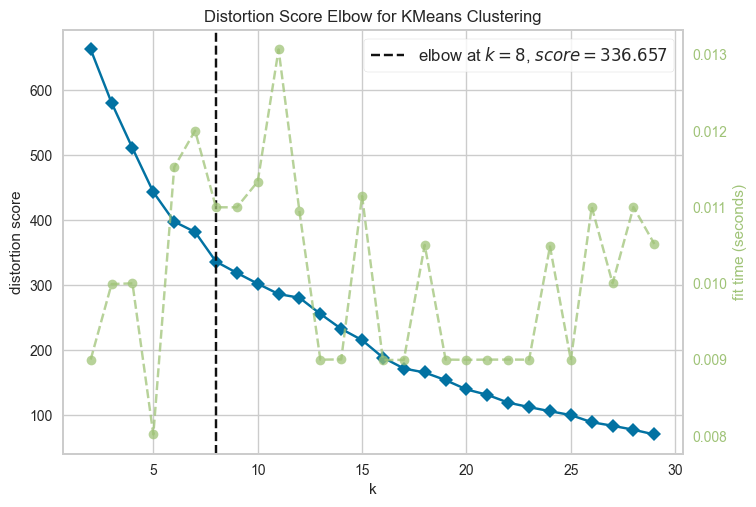

,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,29
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [184]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2 = deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

In [185]:
cluster_var = 'cluster' # definan nombre de var de clustering
x_data_cl = f_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var] = cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl.head(5)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order,device_fitbit,cluster
0,18,1,180.3,90.0,263.712021,98.107037,5.691814,0.219675,5.521914,5.330516,70.658537,0.278428,27.448500,0.221784,14.734703,51.967144,2.512195,0.109756,1
1,18,1,183.0,70.3,125.815394,89.381804,24.126067,3.449738,5.707243,5.607635,52.353092,0.627683,37.028712,0.250086,11.623624,56.293753,2.299270,0.452555,0
2,19,0,172.0,72.5,8.176872,82.207358,28.239197,7.872115,6.024397,6.108524,76.963067,0.374288,5.244291,0.042656,1.361898,46.389634,1.681159,0.500000,2
3,19,1,180.0,62.7,21.022222,104.550599,20.558248,4.282829,6.285402,5.996175,67.216570,-0.369368,37.334029,0.280945,9.075219,34.535250,2.423077,0.500000,0
4,19,1,183.0,65.7,9.408818,71.567986,20.456147,7.873097,6.303781,6.291123,54.909987,0.628373,16.657999,0.100651,3.654881,46.430178,2.468354,0.500000,2


In [186]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(x_data_norm, pred_cl)
sil_avg


0.2228057552079432

In [130]:
df_mean_by_cluster = x_data_cl.groupby("cluster").mean().reset_index()
df_mean_by_cluster

,cluster,age,device_fitbit,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity_order
0,0,30.358974,1.000000,0.461538,170.012821,70.630769,5.851282,72.384751,32.193275,15.776255,4.791695,3.940780,65.222383,0.960664,7.162368,0.033887,9.038232,423.813980,2.508270
1,1,29.115385,0.057692,0.480769,169.967308,70.469231,171.131562,92.506851,7.976252,0.572190,6.122388,6.060762,69.046202,-0.035645,23.460649,0.196706,8.639083,41.137637,2.407777
2,2,26.857143,1.000000,0.428571,167.971429,72.200000,30.343099,79.300029,40.233405,111.035534,5.245202,2.461345,14.251984,0.251091,65.048044,0.362840,30.424161,6873.962091,2.658387
